In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import torch
import sklearn


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
df = pd.read_json("hf://datasets/toughdata/quora-question-answer-dataset/Quora-QuAD.jsonl", lines=True)
df.shape

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


(56402, 2)

In [7]:
df.head(5)

,question,answer
0,Why whenever I get in the shower my girlfriend...,Isn’t it awful? You would swear that there was...
1,"What is a proxy, and how can I use one?",A proxy server is a system or router that prov...
2,"What song has the lyrics ""someone left the cak...",MacArthur's Park\n
3,I am the owner of an adult website called http...,Don't let apps that are liers put adds on your...
4,Does the Bible mention anything about a place ...,St. John in the book of Revelation mentions an...


In [8]:
# Remove null values
df.dropna()
df.shape

(56402, 2)

In [9]:
#Remove duplicate entries
df.drop_duplicates(keep='first', inplace=True)
df.shape

(55182, 2)

In [10]:
# To expand abbreviations
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

Preprocessing the text in the dataset

In [11]:
def preprocess_text(val, stem=0):
    # Convert to lowercase
    val = val.lower()
    # Remove punctuation
    val = val.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(val)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Replace Slangs
    tokenised=[]
    for word in tokens:
      if word in abbreviations.keys():
        tokenised.extend(abbreviations[word])
      else:
        tokenised.append(word)
    print(tokenised)
    if(stem==0):
      # Stemming
      stemmer = PorterStemmer()
      tokenised = [stemmer.stem(word) for word in tokenised]
    else:
      # Lemmatization
      lemmatizer = WordNetLemmatizer()
      tokenised = [lemmatizer.lemmatize(word) for word in tokenised]
    return ' '.join(tokenised)

In [12]:
%%capture
df_preprocessed=pd.DataFrame(columns=['question', 'answer'])
df_preprocessed['question'] = df['question'].apply(preprocess_text, 1)
df_preprocessed['answer'] = df['answer'].apply(preprocess_text, 1)

In [13]:
df_preprocessed.head(5)

,question,answer
0,whenev get shower girlfriend want join,’ aw would swear ’ enough hot water go around
1,proxi use one,proxi server system router provid gateway user...
2,song lyric someon left cake rain,macarthur park
3,owner adult websit call httpsmatureanalloversc...,dont let a p p l i c a t i o n s lier put add ...
4,bibl mention anyth place heaven hell,st john book revel mention address scholar sug...


Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
# Using Raw inputs for individual models' tokenisers
x_train, x_test, y_train, y_test = train_test_split(df['question'], df['answer'], random_state= 2, test_size=0.2, shuffle=True)

In [15]:
df_train = pd.concat([x_train, y_train], join='outer', axis=1)
df_test = pd.concat([x_test, y_test], join='outer', axis=1)
df_test.head()

,question,answer
1611,How will humans look in 1000 years?,Pretty much exactly the same as we do now.\n I...
41914,If you were 80 and you had the option to becom...,"Yes, some of the most enjoyable years of my li..."
24427,"Every year, the top 5 mutual funds changes. Ho...","However much we as investors wish, there are n..."
912,How do I get my neighbor to accept the survey ...,Let him pay for his own survey. In the meantim...
10458,"Is ""Star Trek II: The Wrath of Khan"" (1982) wo...",A2A\n Absolutely. As a child I found The Motio...


GPT2 setup

In [16]:
!pip install -U transformers


In [17]:

from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments, Seq2SeqTrainingArguments
from datasets import Dataset


In [26]:
gpt_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt_model = GPT2LMHeadModel.from_pretrained("gpt2")

In [27]:
def gpt_preprocess_function(examples):
    inputs = ["answer the question: " + q for q in examples["question"]]
    model_inputs = gpt_tokenizer(inputs, max_length=512, truncation=True)
    labels = gpt_tokenizer(examples["answer"], max_length=512, truncation=True)
    return model_inputs

In [28]:
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    learning_rate=2e-4,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=3,
    predict_with_generate=True,
)

In [29]:
dst_train = Dataset.from_pandas(df_train)

In [30]:
dst_test = Dataset.from_pandas(df_test)

T5 setup

In [31]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, Seq2SeqTrainer, Seq2SeqTrainingArguments
t5_tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")
t5_model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base")

In [32]:
def t5_preprocess_function(examples):
    inputs = ["answer the question: " + q for q in examples["question"]]
    model_inputs = t5_tokenizer(inputs, padding='max_length', max_length=128, truncation=True)
    labels = t5_tokenizer(examples["answer"],padding='max_length', max_length=512, truncation=True)
    return model_inputs

BERT

In [33]:
def bert_preprocess_function(examples):
    inputs = bert_tokenizer(examples["question"], examples["answer"], truncation=True, padding="max_length", max_length=512)
    return inputs

In [34]:
dataset = Dataset.from_pandas(df)

In [35]:
from transformers import BertTokenizer, BertForQuestionAnswering, Trainer, TrainingArguments
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertForQuestionAnswering.from_pretrained("bert-base-uncased")
training_args = TrainingArguments(
    output_dir="./bert-qa-model",
    per_device_train_batch_size=2,
    num_train_epochs=3,
    logging_steps=10)

trainer = Trainer(
    model=bert_model,
    args=training_args,
    train_dataset=dataset.map(bert_preprocess_function, batched=True))
trainer.train()

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/55182 [00:00<?, ? examples/s]

Streaming output truncated to the last 5000 lines.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.


ValueError: API key must be 40 characters long, yours was 2

In [38]:
bert_tokenized_dst_train = dst_train.map(bert_preprocess_function, batched=True)
bert_tokenized_dst_test = dst_test.map(bert_preprocess_function, batched=True)

Map:   0%|          | 0/44145 [00:00<?, ? examples/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Map:   0%|          | 0/11037 [00:00<?, ? examples/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

T5

In [39]:
t5_tokenized_dst_train = dst_train.map(t5_preprocess_function, batched=True)
t5_tokenized_dst_test = dst_test.map(t5_preprocess_function, batched=True)

Map:   0%|          | 0/44145 [00:00<?, ? examples/s]

Map:   0%|          | 0/11037 [00:00<?, ? examples/s]

GPT

In [44]:
gpt_tokenized_dst_train = dst_train.map(gpt_preprocess_function, batched=True)
gpt_tokenized_dst_test = dst_test.map(gpt_preprocess_function, batched=True)

Map:   0%|          | 0/44145 [00:00<?, ? examples/s]

Map:   0%|          | 0/11037 [00:00<?, ? examples/s]

BERT

In [41]:
print(bert_tokenized_dst_train)
bert_tokenized_dst_test

Dataset({
    features: ['question', 'answer', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 44145
})


Dataset({
    features: ['question', 'answer', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 11037
})

T5

In [42]:
print(t5_tokenized_dst_train)
print(t5_tokenized_dst_test)

Dataset({
    features: ['question', 'answer', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 44145
})
Dataset({
    features: ['question', 'answer', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 11037
})


GPT

In [45]:
print(gpt_tokenized_dst_train)
print(gpt_tokenized_dst_test)

Dataset({
    features: ['question', 'answer', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 44145
})
Dataset({
    features: ['question', 'answer', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 11037
})


BERT

In [46]:
bert_tok_dst_train_sampled = bert_tokenized_dst_train.shuffle(seed=42).select(range(2000))
bert_tok_dst_test_sampled = bert_tokenized_dst_test.shuffle(seed=42).select(range(100))

T5

In [47]:
t5_tok_dst_train_sampled = t5_tokenized_dst_train.shuffle(seed=42).select(range(5000))
t5_tok_dst_test_sampled = t5_tokenized_dst_test.shuffle(seed=42).select(range(100))

GPT

In [61]:
gpt_tok_dst_train_sampled = gpt_tokenized_dst_train.shuffle(seed=42).select(range(2000))
gpt_tok_dst_test_sampled = gpt_tokenized_dst_test.shuffle(seed=42).select(range(10))

Predictions T5

---



---



---



In [49]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=d0acf08a43041526eecdde3fed1b5689ed41286e451179f3121e875cf6fde8ef
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [50]:
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu

In [51]:
import sklearn

In [52]:
from nltk.translate.bleu_score import sentence_bleu

In [53]:
def compute_rouge(predictions, references):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = [scorer.score(pred, ref) for pred, ref in zip(predictions, references)]
    return scores

def compute_bleu(predictions, references):
    scores = [sentence_bleu([ref.split()], pred.split()) for pred, ref in zip(predictions, references)]
    return scores

def compute_f1(predictions, references):
    predictions = [pred.split() for pred in predictions]
    references = [ref.split() for ref in references]
    scores = [sklearn.metrics.f1_score(ref, pred, average='weighted') for pred, ref in zip(predictions, references)]
    return scores

In [54]:
def generate_predictions_t5(dataset):
    predictions = []
    references = []
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    t5_model.to(device)
    t5_model.eval()
    for example in dataset:
        input_text = f"answer the question: {example['question']}"
        input_ids = t5_tokenizer.encode(input_text, return_tensors="pt")
        with torch.no_grad():
            output = t5_model.generate(input_ids, max_length=512, num_return_sequences=1)
            answer = t5_tokenizer.decode(output[0], skip_special_tokens=True)
        predictions.append(answer)
        references.append(example['answer'])
    return predictions, references

In [55]:
def generate_predictions_bert(dataset):
    predictions = []
    references = []

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    bert_model.to(device)
    bert_model.eval()

    for example in dataset:
        question = example["question"]

        inputs = bert_tokenizer.encode_plus(question, return_tensors="pt").to(device)

        with torch.no_grad():
            outputs = bert_model(**inputs)
            start_logits = outputs.start_logits
            end_logits = outputs.end_logits

            # Get the most likely start and end tokens
            start_index = torch.argmax(start_logits)
            end_index = torch.argmax(end_logits)

            input_ids = inputs["input_ids"][0]
            answer_tokens = input_ids[start_index: end_index + 1]
            answer = bert_tokenizer.decode(answer_tokens, skip_special_tokens=True)

        predictions.append(answer)
        references.append(example["answer"])

    return predictions, references



In [56]:
def generate_predictions_gpt(dataset):
    predictions = []
    references = []
    for example in dataset:
        input_text = f"answer the question: {example['question']}"
        input_ids = gpt_tokenizer.encode(input_text, return_tensors="pt")
        with torch.no_grad():
            output = gpt_model.generate(input_ids, max_length=512, num_return_sequences=1)
            answer = gpt_tokenizer.decode(output[0], skip_special_tokens=True)
        predictions.append(answer)
        references.append(example['answer'])
    return predictions, references

In [57]:
predictions_t5, references_t5 = generate_predictions_t5(t5_tok_dst_test_sampled)

In [58]:
predictions_bert, references_bert = generate_predictions_bert(bert_tok_dst_test_sampled)

In [62]:
predictions_gpt, references_gpt = generate_predictions_gpt(gpt_tok_dst_test_sampled)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

In [63]:
def compute_rouge(predictions, references):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = [scorer.score(pred, ref) for pred, ref in zip(predictions, references)]
    return scores

Evaluation


In [64]:
from nltk.translate.bleu_score import sentence_bleu
from sklearn.metrics import f1_score

Rouge Scores

In [65]:
#T5
rouge_scores = compute_rouge(predictions_t5, references_t5)
avg_rouge = {key: sum(score[key].fmeasure for score in rouge_scores) / len(rouge_scores) for key in rouge_scores[0]}
print(f"Average ROUGE scores: {avg_rouge}")

Average ROUGE scores: {'rouge1': 0.03633604325659316, 'rouge2': 0.007190438551667158, 'rougeL': 0.033236158330187615}


In [68]:
#BERT
rouge_scores = compute_rouge(predictions_bert, references_bert)
avg_rouge = {key: sum(score[key].fmeasure for score in rouge_scores) / len(rouge_scores) for key in rouge_scores[0]}
print(f"Average ROUGE scores: {avg_rouge}")

Average ROUGE scores: {'rouge1': 0.03531297479487435, 'rouge2': 0.005773412803475344, 'rougeL': 0.03077765794039062}


In [67]:
#GPT
rouge_scores = compute_rouge(predictions_gpt, references_gpt)
avg_rouge = {key: sum(score[key].fmeasure for score in rouge_scores) / len(rouge_scores) for key in rouge_scores[0]}
print(f"Average ROUGE scores: {avg_rouge}")

Average ROUGE scores: {'rouge1': 0.08987458385671784, 'rouge2': 0.012392937902222853, 'rougeL': 0.07646489002392134}


BLEU


In [69]:
#T5
bleu_scores = compute_bleu(predictions_t5, references_t5)
avg_bleu = sum(bleu_scores) / len(bleu_scores)
print(f"Average BLEU score: {avg_bleu}")


Average BLEU score: 1.2770167793782132e-80


/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [70]:
#BERT
bleu_scores = compute_bleu(predictions_bert, references_bert)
avg_bleu = sum(bleu_scores) / len(bleu_scores)
print(f"Average BLEU score: {avg_bleu}")

Average BLEU score: 9.818196498280712e-06


In [116]:
#GPT
bleu_scores = compute_bleu(predictions_gpt, references_gpt)
avg_bleu = sum(bleu_scores) / len(bleu_scores)
print(f"Average BLEU score: {avg_bleu}")

Average BLEU score: 0.0017485099706965135


F1 Score

In [71]:
#T5
def compute_exact_f1(preds, refs):
    exact_matches = [int(p.strip().lower() == r.strip().lower()) for p, r in zip(preds, refs)]
    return f1_score([1]*len(exact_matches), exact_matches)

score = compute_exact_f1(predictions_t5, references_t5)
print(f"F1 score: {score}")

F1 score: 0.0


In [72]:
#BERT
def compute_exact_f1(preds, refs):
    exact_matches = [int(p.strip().lower() == r.strip().lower()) for p, r in zip(preds, refs)]
    return f1_score([1]*len(exact_matches), exact_matches)

score = compute_exact_f1(predictions_bert, references_bert)
print(f"F1 score: {score}")

F1 score: 0.0


In [73]:
#GPT
def compute_exact_f1(preds, refs):
    exact_matches = [int(p.strip().lower() == r.strip().lower()) for p, r in zip(preds, refs)]
    return f1_score([1]*len(exact_matches), exact_matches)

score = compute_exact_f1(predictions_gpt, references_gpt)
print(f"F1 score: {score}")

F1 score: 0.0


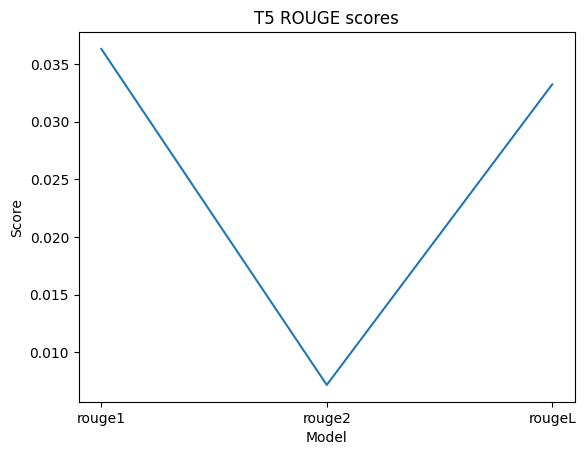

In [74]:
import matplotlib.pyplot as plt
model = ['rouge1','rouge2','rougeL']
score = [0.0363,0.00719,0.03323]

plt.plot(model, score)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('T5 ROUGE scores')
plt.show()

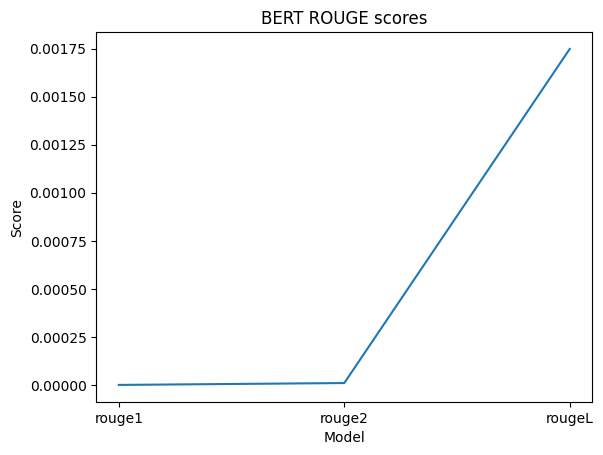

In [75]:
import matplotlib.pyplot as plt
model = ['rouge1','rouge2','rougeL']
score = [0.000000001,0.0000098,0.0017485]

plt.plot(model, score)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('BERT ROUGE scores')
plt.show()

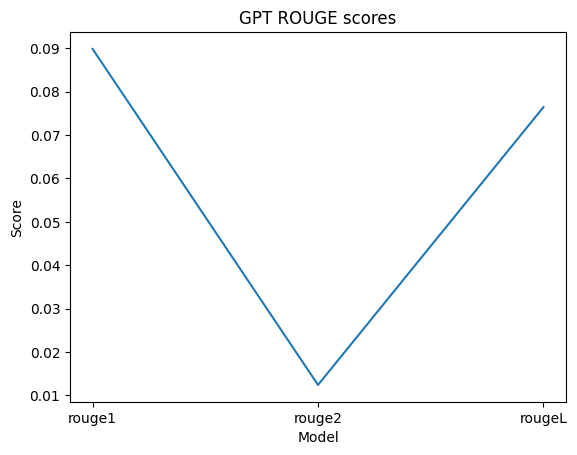

In [76]:
import matplotlib.pyplot as plt
model = ['rouge1','rouge2','rougeL']
score = [0.08987,0.01239,0.07646]

plt.plot(model, score)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('GPT ROUGE scores')
plt.show()